In [1]:
import os

import pandas as pd
import numpy as np
from numpy import savetxt

import keras 
from keras.models import Sequential
from keras.layers import Activation 
from keras.layers.core import Dense 
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.utils import to_categorical

%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold

import xgboost as xgb

import itertools
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import random as rn

Using TensorFlow backend.


In [0]:
seed = 97
np.random.seed (seed)
rn.seed (seed)

In [0]:
# Initial data preparation 

copd_data = pd.read_csv('First_Dataset-80.csv') # for the first dataset:'First_Dataset-80.csv' / for the second dataset:'Second_Dataset-239.csv' 
copd_data_columns = copd_data.columns

# Uncomment the line below to normalize data in 80-dataset  
#Features =  pd.DataFrame(preprocessing.normalize(copd_data[copd_data_columns[copd_data_columns != 'Diagnosis']])) # all columns except Diagnosis

# Uncomment the line below to scale data in 239-dataset   
#Features =  pd.DataFrame(preprocessing.scale(copd_data[copd_data_columns[copd_data_columns != 'Diagnosis']])) # all columns except Diagnosis

Diagnosis = copd_data['Diagnosis'] # Diagnosis column

In [0]:
X_train, X_test, y_train, y_test = train_test_split(Features, Diagnosis, test_size=0.2)

In [0]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('Actual Medical Diagnosis')
    plt.xlabel('Neural Network Prediction')

In [7]:
ANN = Sequential([
                  
    #Dropout(0.2, input_shape=(7,)),       # uncomment for the first dataset (80-dataset)
    #Dropout(0.2, input_shape=(3,)),       # uncomment for the second dataset (239-dataset)

    Dense(4, activation='sigmoid'),
    Dense(2, activation='softmax')
])




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [8]:
ANN.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
ANN.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, shuffle=True, verbose=2)

Train on 42 samples, validate on 22 samples
Epoch 1/1000
 - 0s - loss: 0.6776 - acc: 0.6667 - val_loss: 0.6880 - val_acc: 0.5000
Epoch 2/1000
 - 0s - loss: 0.7043 - acc: 0.5000 - val_loss: 0.6881 - val_acc: 0.5000
Epoch 3/1000
 - 0s - loss: 0.6865 - acc: 0.5238 - val_loss: 0.6881 - val_acc: 0.5000
Epoch 4/1000
 - 0s - loss: 0.6969 - acc: 0.5238 - val_loss: 0.6881 - val_acc: 0.5000
Epoch 5/1000
 - 0s - loss: 0.6879 - acc: 0.5952 - val_loss: 0.6881 - val_acc: 0.5000
Epoch 6/1000
 - 0s - loss: 0.6768 - acc: 0.6429 - val_loss: 0.6881 - val_acc: 0.5000
Epoch 7/1000
 - 0s - loss: 0.6986 - acc: 0.5476 - val_loss: 0.6881 - val_acc: 0.5000
Epoch 8/1000
 - 0s - loss: 0.6982 - acc: 0.5238 - val_loss: 0.6881 - val_acc: 0.5000
Epoch 9/1000
 - 0s - loss: 0.6880 - acc: 0.5238 - val_loss: 0.6881 - val_acc: 0.5000
Epoch 10/1000
 - 0s - loss: 0.6913 - acc: 0.6190 - val_loss: 0.6881 - val_acc: 0.5000
Epoch 11/1000
 - 0s - loss: 0.6747 - acc: 0.6429 - val_loss: 0.6881 - val_acc: 0.5000
Epoch 12/1000
 - 0s

In [0]:
rounded_predictions = ANN.predict_classes(X_test, batch_size=10, verbose=0)

In [12]:
Network_Performance = np.mean(y_test==rounded_predictions)
Network_Performance

0.6875

In [13]:
# K-Folds Cross-validation of the ANN model

kf = KFold(n_splits = 5, shuffle = True)

scores = []
for i in range(5):
    result = next(kf.split(Features), None)
    kfold_x_train = Features.iloc[result[0]]
    kfold_x_test = Features.iloc[result[1]]
    kfold_y_train = Diagnosis.iloc[result[0]]
    kfold_y_test = Diagnosis.iloc[result[1]]
    kfold_model = ANN.fit(kfold_x_train,kfold_y_train)
    kfold_predictions = ANN.predict_classes(kfold_x_test)
    scores.append(np.mean(kfold_y_test==kfold_predictions))
print('Scores from each iteration: ', scores)
print('Average 5-Fold Score :' , np.mean(scores))

Epoch 1/1
64/64 [==============================] - 0s 141us/step - loss: 0.6904 - acc: 0.5469
Epoch 1/1
64/64 [==============================] - 0s 94us/step - loss: 0.6807 - acc: 0.5469
Epoch 1/1
64/64 [==============================] - 0s 93us/step - loss: 0.6856 - acc: 0.5625
Epoch 1/1
64/64 [==============================] - 0s 95us/step - loss: 0.6850 - acc: 0.5781
Epoch 1/1
64/64 [==============================] - 0s 102us/step - loss: 0.6895 - acc: 0.5156
Scores from each iteration:  [0.8125, 0.875, 0.8125, 0.5625, 0.625]
Average 5-Fold Score : 0.7375


In [0]:
cm = confusion_matrix(y_test, rounded_predictions)

Confusion matrix, without normalization
[[4 5]
 [0 7]]


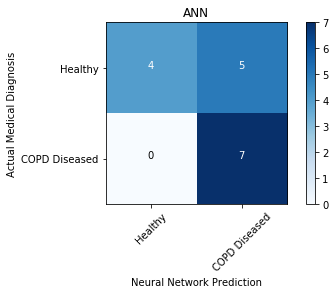

In [15]:
cm_plot_labels = ['Healthy', 'COPD Diseased']
plot_confusion_matrix(cm, cm_plot_labels, title='ANN')

In [16]:
# SVM classifier performance
svc = SVC(kernel = 'rbf',C=1000, gamma=0.1, probability = True)

y_pred_SVM = svc.fit(X_train, y_train).predict(X_test)
t = pd.DataFrame(svc.predict_proba(X_test))
svc.score(X_train,y_train), svc.score(X_test, y_test)

(0.9375, 0.875)

In [17]:
# K-Folds Cross-validation of the SVM model

cv_SVM = cross_val_score(svc, Features, Diagnosis, cv=5)
print('Scores from each iteration: ', cv_SVM)
print("Average 5-Fold Score : {}".format(np.mean(cv_SVM)))

Scores from each iteration:  [1.     0.9375 0.8125 0.9375 0.875 ]
Average 5-Fold Score : 0.9125


Confusion matrix, without normalization
[[7 2]
 [0 7]]


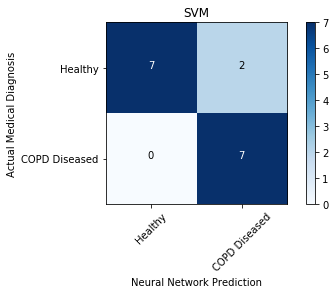

In [18]:
cm_SVM = confusion_matrix(y_test,y_pred_SVM)
plot_confusion_matrix(cm_SVM, cm_plot_labels, title='SVM')

In [19]:
# Gaussian Naive Bayer classifier performance

gnb = GaussianNB()
y_pred_GNB = gnb.fit(X_train, y_train).predict(X_test)
gnb.score(X_train,y_train), gnb.score(X_test, y_test)

(0.921875, 0.9375)

In [20]:
# K-Folds Cross-validation of the GNB model

cv_GNB = cross_val_score(gnb, Features, Diagnosis, cv=5)
print('Scores from each iteration: ', cv_GNB)
print("Average 5-Fold Score : {}".format(np.mean(cv_GNB)))

Scores from each iteration:  [0.9375 0.9375 0.9375 0.875  0.6875]
Average 5-Fold Score : 0.875


Confusion matrix, without normalization
[[9 0]
 [1 6]]


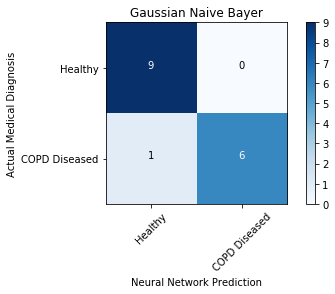

In [21]:
cm_GNB = confusion_matrix(y_test,y_pred_GNB)
plot_confusion_matrix(cm_GNB, cm_plot_labels, title='Gaussian Naive Bayer')

In [22]:
# Logistic Regression classifier performance

CLF = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
y_pred_CLF = CLF.fit(X_train, y_train).predict(X_test)

CLF.score(X_train,y_train), CLF.score(X_test, y_test)

(0.53125, 0.5)

In [23]:
# K-Folds Cross-validation of the CLF model

cv_CLF = cross_val_score(CLF, Features, Diagnosis, cv=5)
print('Scores from each iteration: ', cv_CLF)
print("Average 5-Fold Score : {}".format(np.mean(cv_CLF)))

Scores from each iteration:  [0.9375 0.9375 0.8125 0.9375 0.875 ]
Average 5-Fold Score : 0.9


Confusion matrix, without normalization
[[1 8]
 [0 7]]


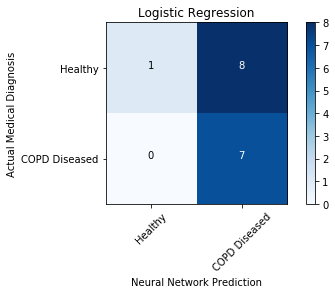

In [24]:
cm_clf = confusion_matrix(y_test,y_pred_CLF)
plot_confusion_matrix(cm_clf, cm_plot_labels, title='Logistic Regression')

In [25]:
# Advanced gradient boosting classifier performance

XGBm = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
y_pred_XGB = XGBm.fit(X_train, y_train).predict(X_test)

XGBm.score(X_train,y_train), XGBm.score(X_test, y_test)

(0.9375, 0.9375)

In [26]:
# K-Folds Cross-validation of the XGB model

cv_XGB = cross_val_score(XGBm, Features, Diagnosis, cv=5)
print('Scores from each iteration: ', cv_XGB)
print("Average 5-Fold Score : {}".format(np.mean(cv_XGB)))

Scores from each iteration:  [0.9375 0.9375 0.8125 0.9375 0.9375]
Average 5-Fold Score : 0.9125


Confusion matrix, without normalization
[[8 1]
 [0 7]]


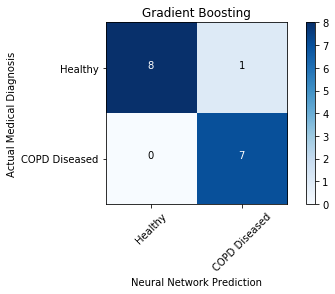

In [27]:
cm_XGB = confusion_matrix(y_test,y_pred_XGB)
plot_confusion_matrix(cm_XGB, cm_plot_labels, title='Gradient Boosting')